In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc

#rc('text', usetex=False)
rc('text', usetex=True)
rc('font', serif ='Times')
rc('font', size=16)
rc('axes', linewidth=0.5)
rc('lines', linewidth=1.15)
rc('figure', figsize=(8.3,5.2))
rc('grid', c='0.5', ls='--', lw=0.5)

In [2]:
def fix_file(fname):
    f = open(fname)
    a= fname.split(".")
    w = open(f"{a[0]}_fix.{a[1]}", "w")

    for line in f:
        if "% x[m] px[rad] y[m] py[rad] z[m]  (pz or dE [GeV])" in line:
            w.write("x[m] px[rad] y[m] py[rad] z[m] dE[GeV] xAction yAction xLastTune yLastTune xLastPhase yLastPhase\n")
        else:
            w.write(line)
    return f"{a[0]}_fix.{a[1]}"

def Farey (n):
    '''Return the n-th Farey sequence, ascending.''' 
    seq = [[0 , 1]]
    a, b, c, d = 0, 1, 1, n
    while c <= n:
        k = int( (n + b)/d )
        a, b, c, d = c, d, k*c-a, k*d-b
        seq.append([a , b])
    return seq

def plotTuneDiagram():
#    fig=plt.figure(figsize=(5,5))
    ax=plt.axes()
#    plt.ylim((0,1))
#    plt.xlim((0,1))
    x=np.linspace(0,1,1000)
    for i in range(1,4):
        FN=Farey(i) 
        for f in FN:
            h,k=f #Node h/k on the axes
            for sf in FN:
                p,q=sf
                c=float(p*h)
                a=float(k*p) #ResonancelineaQx+bQy=clinkedtop/q
                b=float(q-k*p)
                if a>0:
                    plt.plot(x,c/a-x*b/a,'b',alpha=.1)
                    plt.plot(x,c/a+x*b/a,'b',alpha=.1)
                    plt.plot(c/a-x*b/a,x,'b',alpha=.1)
                    plt.plot(c/a+x*b/a,x,'b',alpha=.1)
                    plt.plot(c/a-x*b/a,1-x,'b',alpha=.1)
                    plt.plot(c/a+x*b/a,1-x,'b',alpha=.1)
                if q==k and p==1: #FNelementsbelow1/k
                    break

    plt.axis('square')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('$Q_x$')
    plt.ylabel('$Q_y$');

In [3]:
df1=pd.read_csv("data/beatingBPM_5000_5e-07_1e+10.csv")
df2=pd.read_csv("data/beating_1000_5e-07_1e+10.csv")
df3=pd.read_csv("data/emitances_gauss_5000_1e-09_1e+10.csv")
df4=pd.read_csv("data/emitances_gauss_5000_1e-10_1e+10.csv")
df5=pd.read_csv("data/emitances_gauss_5000_5e-10_1e+10.csv")
df6=pd.read_csv("data/emitances_kv_5000_1e-10_1e+10.csv")


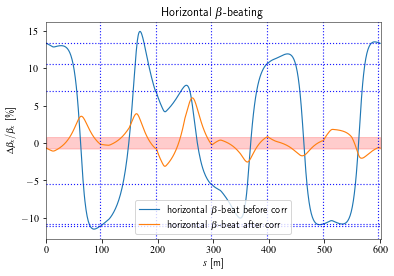

In [16]:
#plt.subplot(211)
plt.title(r"Horizontal $\beta$-beating")

plt.plot(df2["s"],df2["beat_x0"], label=r"horizontal $\beta$-beat before corr")
plt.plot(df2["s"],df2["beat_x1"], label=r"horizontal $\beta$-beat after corr")

[plt.axhline(x,color = "blue", ls=":",alpha=0.9) for x in df1["beatxBPM1"]]
#[plt.axhline(x,color = "red",ls=":",alpha=0.5) for x in df1["beatxBPM2"]]
plt.fill_between(df2["s"],y1=[df1["beatxBPM2"].max() for x in df2["s"]],y2=[df1["beatxBPM2"].min() for x in df2["s"]], color = "r", alpha=0.2)
[plt.axvline(s,color = "blue",ls=":",alpha=0.9) for s in df1["sBPM"]]
plt.legend()

plt.xlim([df2["s"].min()-1.,df2["s"].max()+1.])

plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$\Delta\beta_x/\beta_x$ [\%]')

#plt.subplot(212)
plt.savefig("beating_x.pdf")

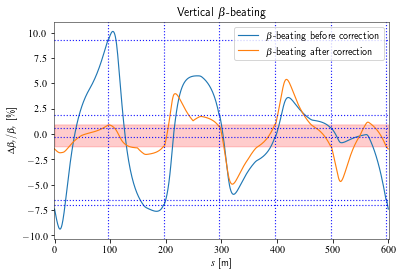

In [15]:
plt.title(r"Vertical $\beta$-beating")

plt.plot(df2["s"],df2["beat_y0"], label=r"$\beta$-beating before correction")
plt.plot(df2["s"],df2["beat_y1"], label=r"$\beta$-beating after correction")

#plt.legend(bbox_to_anchor=(0., 0.94, 1., .01), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.legend()
[plt.axhline(y,color = "blue", ls=":",alpha=0.9) for y in df1["beatyBPM1"]]
#[plt.axhline(y,color = "red",ls=":",alpha=0.5) for y in df1["beatyBPM2"]]
plt.fill_between(df2["s"],y1=[df1["beatyBPM2"].max() for x in df2["s"]],y2=[df1["beatyBPM2"].min() for x in df2["s"]], color = "r", alpha=0.2)
[plt.axvline(s,color = "blue",ls=":",alpha=0.9) for s in df1["sBPM"]]

plt.xlim([df2["s"].min()-1.,df2["s"].max()+1.])

plt.xlabel(r'$s$ [m]')
plt.ylabel(r'$\Delta\beta_y/\beta_y$ [\%]')
#plt.subplots_adjust(bottom=0.15,left=0.15,hspace=0.5)

plt.savefig("beating_y.pdf")

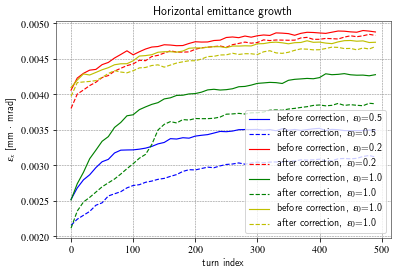

In [6]:
turn = 10*np.array(df3.index)
plt.plot(turn,df3["emitX"]*10**(6),color = "b", label = r"before correction, $\epsilon_0$=0.5")
plt.plot(turn,df3["emitXcorr"]*10**(6),color = "b",ls = "--", label = r"after correction, $\epsilon_0$=0.5")
         
plt.plot(10*np.array(df4.index),df4["emitX"]*10**(6),color = "r", label = r"before correction, $\epsilon_0$=0.2")
plt.plot(10*np.array(df4.index),df4["emitXcorr"]*10**(6),color = "r",ls = "--", label = r"after correction, $\epsilon_0$=0.2")

plt.plot(10*np.array(df5.index),df5["emitX"]*10**(6),color = "g", label = r"before correction, $\epsilon_0$=1.0")
plt.plot(10*np.array(df5.index),df5["emitXcorr"]*10**(6),color = "g",ls = "--", label = r"after correction, $\epsilon_0$=1.0")

plt.plot(10*np.array(df6.index),df6["emitX"]*10**(6),color = "y", label = r"before correction, $\epsilon_0$=1.0")
plt.plot(10*np.array(df6.index),df6["emitXcorr"]*10**(6),color = "y",ls = "--", label = r"after correction, $\epsilon_0$=1.0")

plt.title("Horizontal emittance growth")
plt.legend()
plt.xlabel("turn index")
plt.ylabel(r"$\epsilon_x$ [mm $\cdot$ mrad]")
plt.grid(True)

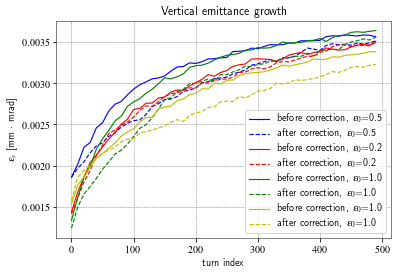

In [7]:
plt.plot(turn,df3["emitY"]*10**(6),color = "b", label = r"before correction, $\epsilon_0$=0.5")
plt.plot(turn,df3["emitYcorr"]*10**(6),color = "b",ls = "--", label = r"after correction, $\epsilon_0$=0.5")
         
plt.plot(10*np.array(df4.index),df4["emitY"]*10**(6),color = "r", label = r"before correction, $\epsilon_0$=0.2")
plt.plot(10*np.array(df4.index),df4["emitYcorr"]*10**(6),color = "r",ls = "--", label = r"after correction, $\epsilon_0$=0.2")

plt.plot(10*np.array(df5.index),df5["emitY"]*10**(6),color = "g", label = r"before correction, $\epsilon_0$=1.0")
plt.plot(10*np.array(df5.index),df5["emitYcorr"]*10**(6),color = "g",ls = "--", label = r"after correction, $\epsilon_0$=1.0")

plt.plot(10*np.array(df6.index),df6["emitY"]*10**(6),color = "y", label = r"before correction, $\epsilon_0$=1.0")
plt.plot(10*np.array(df6.index),df6["emitYcorr"]*10**(6),color = "y",ls = "--", label = r"after correction, $\epsilon_0$=1.0")

plt.title("Vertical emittance growth")
plt.legend()
plt.xlabel("turn index")
plt.ylabel(r"$\epsilon_y$ [mm $\cdot$ mrad]")
plt.grid(True)

In [14]:
df =pd.read_csv(fix_file("bunch_gauss_15000_1e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df_corr =pd.read_csv(fix_file("bunch_corr_gauss_15000_1e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df1 =pd.read_csv(fix_file("bunch_gauss_5000_5e-08_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df1_corr =pd.read_csv(fix_file("bunch_corr_gauss_5000_5e-08_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df2 =pd.read_csv(fix_file("bunch_gauss_5000_5e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df2_corr =pd.read_csv(fix_file("bunch_corr_gauss_5000_5e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df3 =pd.read_csv(fix_file("bunch_gauss_15000_3e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df3_corr =pd.read_csv(fix_file("bunch_corr_gauss_15000_3e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df4 =pd.read_csv(fix_file("bunch_gauss_15000_2e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df4_corr =pd.read_csv(fix_file("bunch_corr_gauss_15000_2e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df5 =pd.read_csv(fix_file("bunch_gauss_15000_5e-10_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df5_corr =pd.read_csv(fix_file("bunch_corr_gauss_15000_5e-10_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df_kv = pd.read_csv(fix_file("bunch_kv_5000_1e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df_kv_corr = pd.read_csv(fix_file("bunch_corr_kv_5000_1e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df1_kv = pd.read_csv(fix_file("bunch_kv_15000_5e-10_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df1_kv_corr = pd.read_csv(fix_file("bunch_corr_kv_15000_5e-10_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df2_kv = pd.read_csv(fix_file("bunchmatched1_kv_5000_5e-10_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df2_kv_corr = pd.read_csv(fix_file("bunch_corrmatched1_kv_5000_5e-10_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

df_ini = pd.read_csv(fix_file("bunch_nosc_kv_100_1e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)
df_ini_corr = pd.read_csv(fix_file("bunch_corr_nosc_kv_100_1e-09_1e+10.dat"), skiprows=14,delimiter=" ",index_col=False)

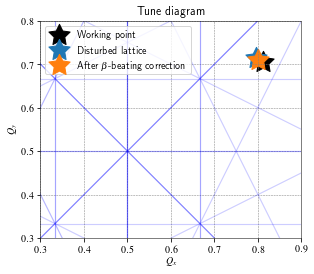

In [75]:
plotTuneDiagram()
#plt.figure(figsize=(15,15))

plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=500, label = "Working point")
plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Disturbed lattice")
plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"After $\beta$-beating correction")

plt.grid(True)
plt.legend(loc="upper left")

plt.title("Tune diagram")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_0.pdf")

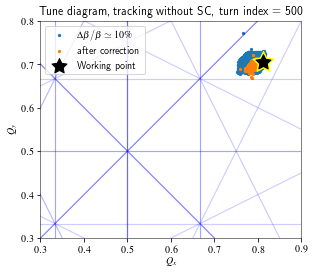

In [76]:
plotTuneDiagram()

plt.scatter(df1["xLastTune"],df1["yLastTune"],s=5, label = r"$\Delta\beta/\beta \simeq 10\%$")
plt.scatter(df1_corr["xLastTune"],df1_corr["yLastTune"], s=5, label="after correction")
plt.scatter([.81122],[.7042], marker = (5, 1), c = "yellow", s=500)
plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=250, label = "Working point")
#plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Working point of disturbed lattice")
#plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"Working point after $\beta$-beating correction")


#plt.grid(True)
plt.legend(loc="upper left")

plt.title("Tune diagram, tracking without SC, turn index = 500")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_1.pdf")

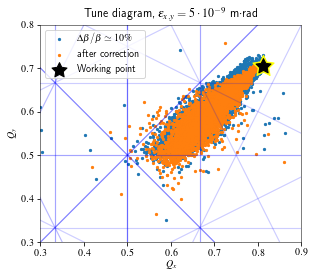

In [74]:
plotTuneDiagram()

plt.scatter(df2["xLastTune"],df2["yLastTune"], s=5, label = r"$\Delta\beta/\beta \simeq 10\%$")
plt.scatter(df2_corr["xLastTune"],df2_corr["yLastTune"], s=5, label="after correction")
plt.scatter([.81122],[.7042], marker = (5, 1), c = "yellow", s=500)
plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=250, label = "Working point")
#plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Working point of disturbed lattice")
#plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"Working point after $\beta$-beating correction")


#plt.grid(True)
plt.legend(loc="upper left")

plt.title(r"Tune diagram, $\epsilon_{x,y}=5\cdot10^{-9}$ m$\cdot$rad")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_2.pdf")

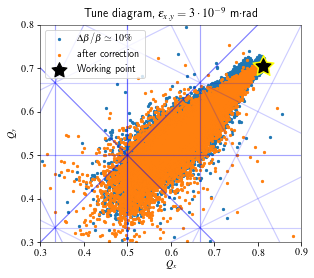

In [77]:
plotTuneDiagram()

plt.scatter(df3["xLastTune"],df3["yLastTune"], s=5, label = r"$\Delta\beta/\beta \simeq 10\%$")
plt.scatter(df3_corr["xLastTune"],df3_corr["yLastTune"], s=5, label="after correction")
plt.scatter([.81122],[.7042], marker = (5, 1), c = "yellow", s=500)
plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=250, label = "Working point")
#plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Working point of disturbed lattice")
#plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"Working point after $\beta$-beating correction")


#plt.grid(True)
plt.legend(loc="upper left")

plt.title(r"Tune diagram, $\epsilon_{x,y}=3\cdot10^{-9}$ m$\cdot$rad")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_3.pdf")

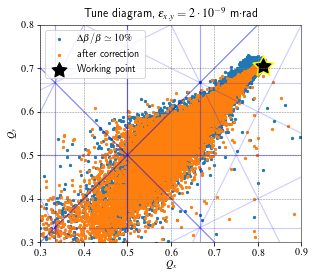

In [78]:
plotTuneDiagram()

plt.scatter(df4["xLastTune"],df4["yLastTune"], s=5, label = r"$\Delta\beta/\beta \simeq 10\%$")
plt.scatter(df4_corr["xLastTune"],df4_corr["yLastTune"], s=5, label="after correction")

plt.scatter([.81122],[.7042], marker = (5, 1), c = "yellow", s=500)
plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=250, label = "Working point")
#plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Working point of disturbed lattice")
#plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"Working point after $\beta$-beating correction")


plt.grid(True)
plt.legend(loc="upper left")

plt.title(r"Tune diagram, $\epsilon_{x,y}=2\cdot10^{-9}$ m$\cdot$rad")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_4.pdf")

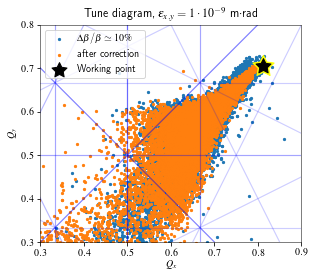

In [79]:
plotTuneDiagram()

plt.scatter(df["xLastTune"],df["yLastTune"], s=5, label = r"$\Delta\beta/\beta \simeq 10\%$")
plt.scatter(df_corr["xLastTune"],df_corr["yLastTune"], s=5, label="after correction")

plt.scatter([.81122],[.7042], marker = (5, 1), c = "yellow", s=500)
plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=250, label = "Working point")
#plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Working point of disturbed lattice")
#plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"Working point after $\beta$-beating correction")

plt.legend(loc="upper left")

plt.title(r"Tune diagram, $\epsilon_{x,y}=1\cdot10^{-9}$ m$\cdot$rad")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_5.pdf")

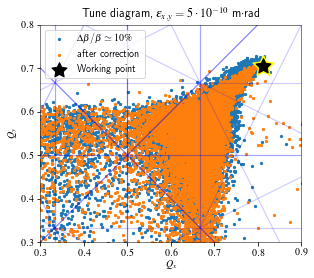

In [81]:
plotTuneDiagram()

plt.scatter(df5["xLastTune"],df["yLastTune"], s=5, label = r"$\Delta\beta/\beta \simeq 10\%$")
plt.scatter(df5_corr["xLastTune"],df_corr["yLastTune"], s=5, label="after correction")

plt.scatter([.81122],[.7042], marker = (5, 1), c = "yellow", s=500)
plt.scatter([.81122],[.7042], marker = (5, 1), c = "black", s=250, label = "Working point")
#plt.scatter(df_ini["xLastTune"].mean(),df_ini["yLastTune"].mean(),marker = (5, 1), s=500, label = "Working point of disturbed lattice")
#plt.scatter(df_ini_corr["xLastTune"].mean(),df_ini_corr["yLastTune"].mean(),marker = (5, 1), s=500, label = r"Working point after $\beta$-beating correction")

plt.legend(loc="upper left")

plt.title(r"Tune diagram, $\epsilon_{x,y}=5\cdot10^{-10}$ m$\cdot$rad")
plt.xlim([0.3,0.9])
plt.ylim([0.3,0.8])

plt.savefig("Tune_diagram_6.pdf")

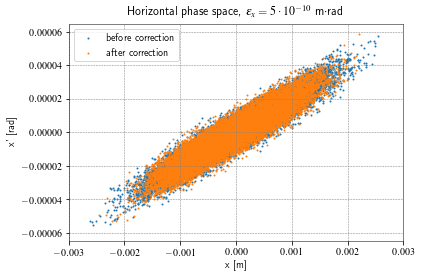

In [103]:
#plt.figure(figsize=(15,15))

plt.scatter(df5["x[m]"],df5["px[rad]"],s=1,label="before correction")
plt.scatter(df5_corr["x[m]"],df5_corr["px[rad]"],s=1,label="after correction")

plt.xlabel("x [m]")
plt.ylabel("x' [rad]")
plt.grid(True)
plt.title("Horizontal phase space, $\epsilon_{x}=5\cdot10^{-10}$ m$\cdot$rad")
plt.xlim([-0.003,0.003])
plt.ylim([-0.000065,0.000065])
plt.legend()
plt.savefig("phase_space_horizontal.pdf")

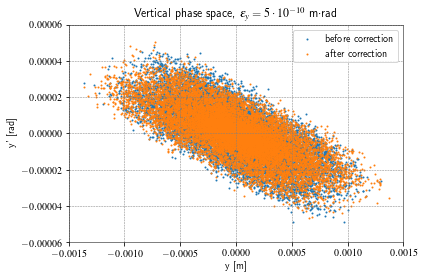

In [102]:
plt.scatter(df5["y[m]"],df5["py[rad]"],s=1,label="before correction")
plt.scatter(df5_corr["y[m]"],df5_corr["py[rad]"],s=1,label="after correction")

plt.xlabel("y [m]")
plt.ylabel("y' [rad]")
plt.grid(True)
plt.title("Vertical phase space, $\epsilon_{y}=5\cdot10^{-10}$ m$\cdot$rad")
plt.xlim([-0.0015,0.0015])
plt.ylim([-0.00006,0.00006])
plt.legend()
plt.savefig("phase_space_vertical.pdf")

(-5e-05, 5e-05)

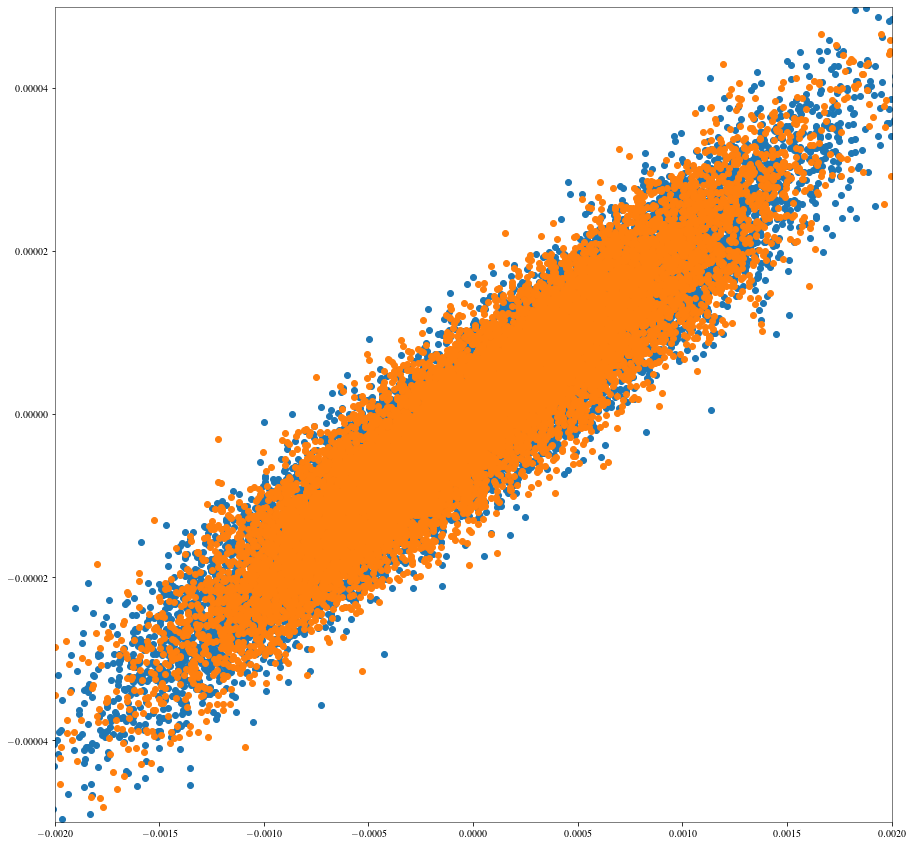

In [132]:
plt.figure(figsize=(15,15))

plt.scatter(df1_kv["x[m]"],df1_kv["px[rad]"])
plt.scatter(df1_kv_corr["x[m]"],df1_kv_corr["px[rad]"])

plt.xlim([-0.002,0.002])
plt.ylim([-0.00005,0.00005])

(-5e-05, 5e-05)

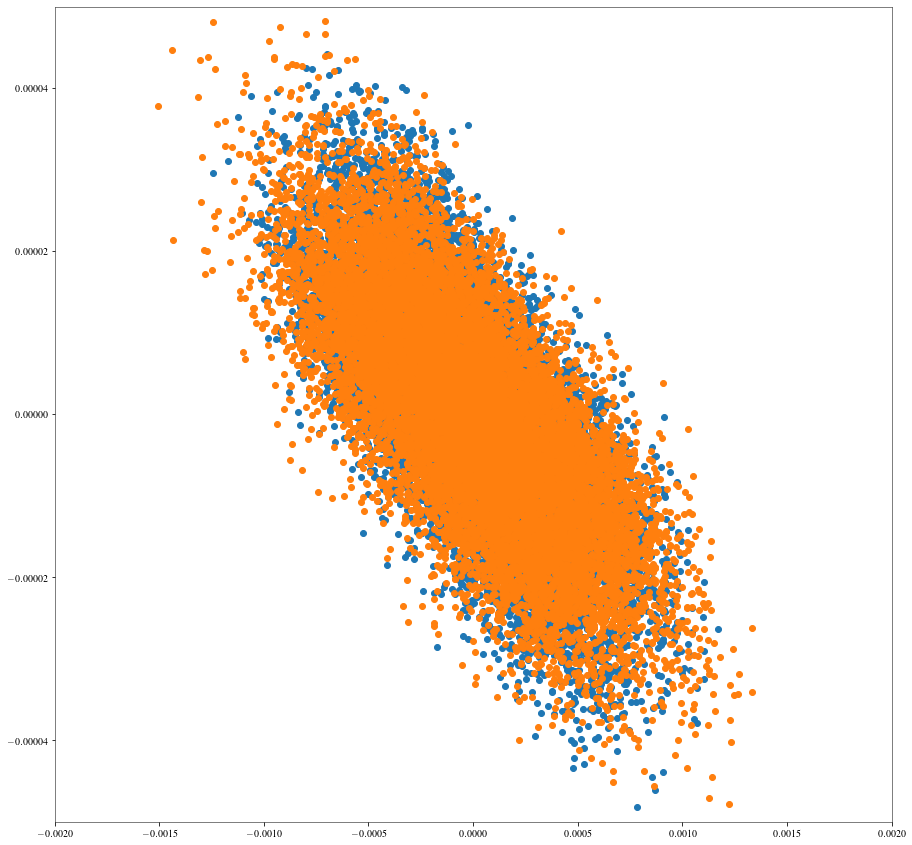

In [135]:
plt.figure(figsize=(15,15))

plt.scatter(df1_kv["y[m]"],df1_kv["py[rad]"])
plt.scatter(df1_kv_corr["y[m]"],df1_kv_corr["py[rad]"])

plt.xlim([-0.002,0.002])
plt.ylim([-0.00005,0.00005])

(-5e-05, 5e-05)

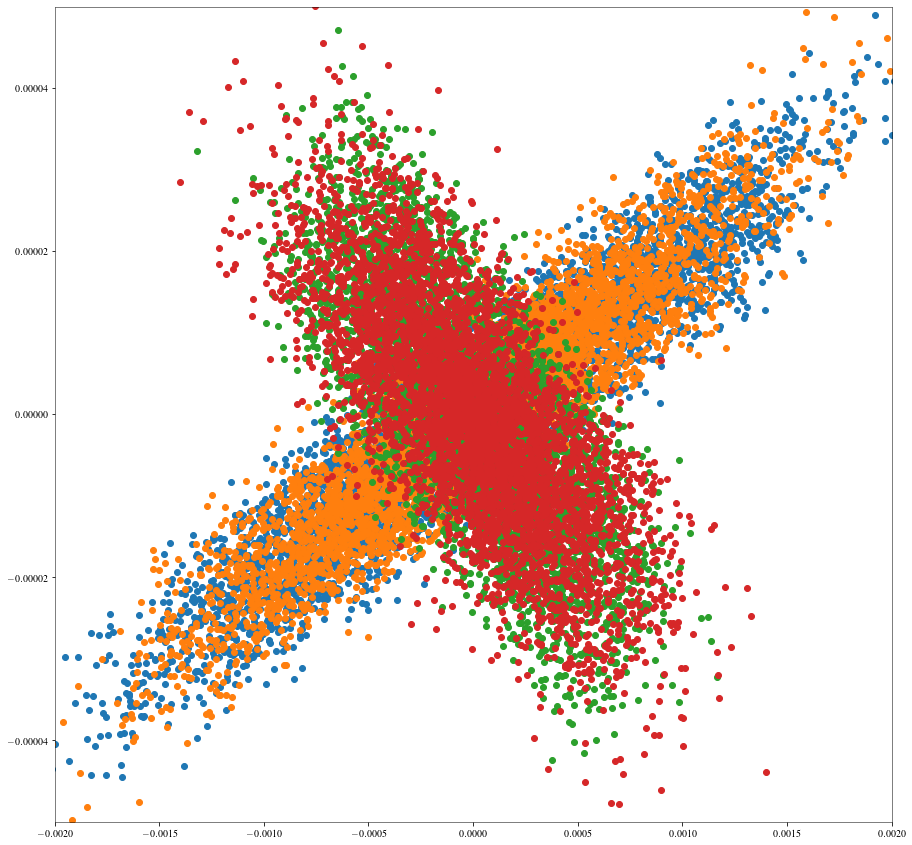

In [138]:
plt.figure(figsize=(15,15))

plt.scatter(df2_kv["x[m]"],df2_kv["px[rad]"])
plt.scatter(df2_kv_corr["x[m]"],df2_kv_corr["px[rad]"])

plt.scatter(df2_kv["y[m]"],df2_kv["py[rad]"])
plt.scatter(df2_kv_corr["y[m]"],df2_kv_corr["py[rad]"])

plt.xlim([-0.002,0.002])
plt.ylim([-0.00005,0.00005])